In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_raw = pd.read_csv("/content/drive/MyDrive/Test1/application_train.csv")
df_raw.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i, j in enumerate(df_raw.columns):
  print(i,j) 1-10 17 28

In [182]:
df_col = np.hstack([
    [i for i in range(1,11)],
    [17,28]
])

df = df_raw.iloc[:,df_col]
df.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,OCCUPATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,-9461,Laborers
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,-16765,Core staff
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,-19046,Laborers


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TARGET              307511 non-null  int64  
 1   NAME_CONTRACT_TYPE  307511 non-null  object 
 2   CODE_GENDER         307511 non-null  object 
 3   FLAG_OWN_CAR        307511 non-null  object 
 4   FLAG_OWN_REALTY     307511 non-null  object 
 5   CNT_CHILDREN        307511 non-null  int64  
 6   AMT_INCOME_TOTAL    307511 non-null  float64
 7   AMT_CREDIT          307511 non-null  float64
 8   AMT_ANNUITY         307499 non-null  float64
 9   AMT_GOODS_PRICE     307233 non-null  float64
 10  DAYS_BIRTH          307511 non-null  int64  
 11  OCCUPATION_TYPE     211120 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 28.2+ MB


In [184]:
df['DAYS_BIRTH'] = pd.to_datetime(df['DAYS_BIRTH'])

In [185]:
df.dropna(axis=0, inplace=True)

In [186]:
df.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,OCCUPATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,1969-12-31 23:59:59.999990539,Laborers
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,1969-12-31 23:59:59.999983235,Core staff
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,1969-12-31 23:59:59.999980954,Laborers


In [187]:
from datetime import datetime
from datetime import date

def calculate_age(born):
    # born = datetime.strptime(born, "%d.%m.%Y").date()
    today = today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
  
df['Age'] = df['DAYS_BIRTH'].apply(calculate_age)

In [188]:
df.drop(['DAYS_BIRTH'], axis=1, inplace=True)

In [189]:
df.drop_duplicates(inplace=True)

In [190]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,OCCUPATION_TYPE,Age
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Laborers,52
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Core staff,52
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Laborers,52
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Laborers,52
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Core staff,52


In [191]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,Age
count,196527.000000,196527.000000,1.965270e+05,1.965270e+05,196527.000000,1.965270e+05,196527.0
mean,0.092435,0.515914,1.777510e+05,6.202889e+05,28329.368446,5.559863e+05,52.0
std,0.289640,0.774381,2.844634e+05,4.079098e+05,14658.845134,3.753482e+05,0.0
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,52.0
25%,0.000000,0.000000,1.125000e+05,2.888730e+05,17775.000000,2.475000e+05,52.0
50%,0.000000,0.000000,1.575000e+05,5.265000e+05,26217.000000,4.545000e+05,52.0
75%,0.000000,1.000000,2.205000e+05,8.353800e+05,35957.250000,7.020000e+05,52.0
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,52.0


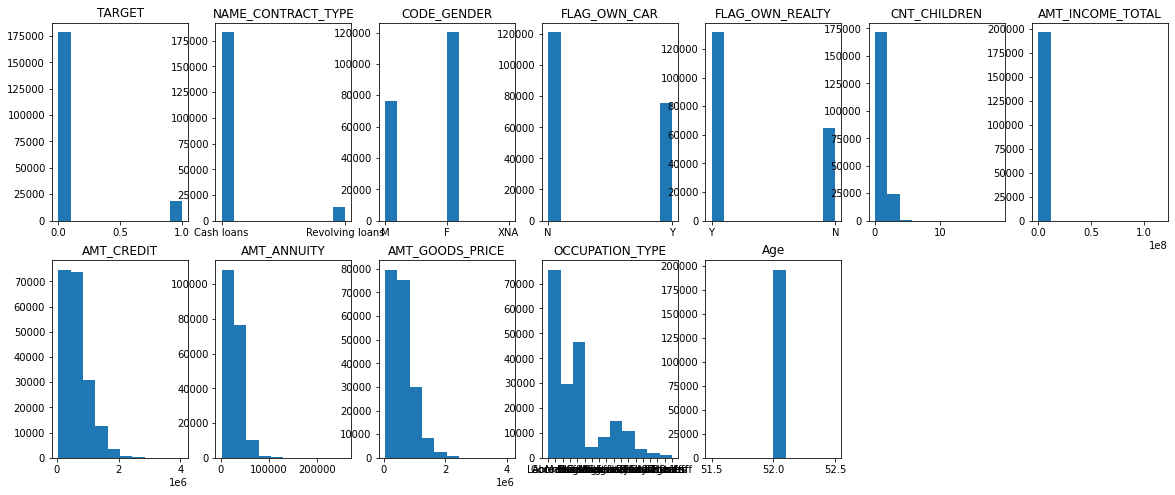

In [192]:
plt.figure(figsize=(20,8))
for i,j in enumerate(df.columns):
  plt.subplot(2,7,i+1)
  plt.hist(df[j])
  plt.title(j)
plt.show()

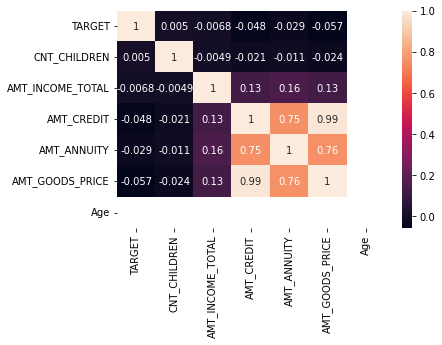

In [193]:
matrix_corr = df.corr()
sns.heatmap(matrix_corr, annot=True)
plt.show()

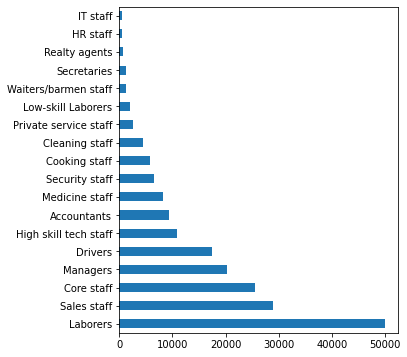

In [194]:
occ = df.OCCUPATION_TYPE.value_counts()
occ.plot(kind='barh', figsize=(5,6))
plt.show()

In [195]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [196]:
df.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,OCCUPATION_TYPE,Age
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Laborers,52
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Core staff,52
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Laborers,52


In [197]:
df_obj = df.select_dtypes(include="object")
le = LabelEncoder()
for i in df_obj.columns:
  df[i] = le.fit_transform(df[i])

In [198]:
x = df.drop(['TARGET','Age'], axis=1)
y = df['TARGET']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=16)

In [200]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
yhat_logr = logr.predict(X_test)

In [201]:
print(classification_report(y_test, yhat_logr))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     53477
           1       0.00      0.00      0.00      5482

    accuracy                           0.91     58959
   macro avg       0.45      0.50      0.48     58959
weighted avg       0.82      0.91      0.86     58959



In [202]:
knn = KNeighborsClassifier()

param = {'n_neighbors':[1,3,5,7,9,10,20]}
clf_knn = GridSearchCV(knn, param)
clf_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 10, 20]})

In [203]:
clf_knn.best_params_

{'n_neighbors': 20}

In [204]:
yhat_knn = clf_knn.predict(X_test)

In [205]:
print(classification_report(y_test, yhat_knn))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     53477
           1       0.00      0.00      0.00      5482

    accuracy                           0.91     58959
   macro avg       0.45      0.50      0.48     58959
weighted avg       0.82      0.91      0.86     58959



In [206]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
yhat_gaus = gaussian.predict(X_test)

In [207]:
print(classification_report(y_test, yhat_gaus))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     53477
           1       0.00      0.00      0.00      5482

    accuracy                           0.91     58959
   macro avg       0.45      0.50      0.48     58959
weighted avg       0.82      0.91      0.86     58959



In [208]:
rfor = RandomForestClassifier(n_estimators=50)
rfor.fit(X_train, y_train)
yhat_rfor = rfor.predict(X_test)

In [209]:
print(classification_report(y_test, yhat_rfor))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     53477
           1       0.10      0.01      0.03      5482

    accuracy                           0.90     58959
   macro avg       0.50      0.50      0.49     58959
weighted avg       0.83      0.90      0.86     58959



In [226]:
df_test_raw = pd.read_csv("/content/drive/MyDrive/Test1/application_test.csv")
df_test = df_test_raw[['SK_ID_CURR'] + x.columns.to_list()]
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,OCCUPATION_TYPE
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,NaN
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Low-skill Laborers
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Drivers
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Sales staff
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,NaN


In [227]:
df_test.dropna(axis=0, inplace=True)

In [228]:
df_test_obj = df_test.select_dtypes(include="object")
for i in df_test_obj.columns:
  df_test[i] = le.fit_transform(df_test[i])

In [231]:
X2 = df_test.drop('SK_ID_CURR', axis=1, inplace=True)

In [214]:
yhat_rfor2 = rfor.predict(X2)